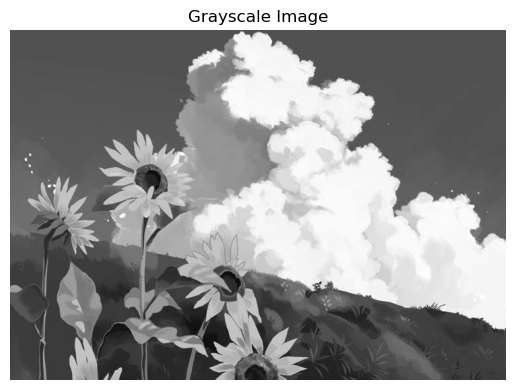

In [77]:
import cv2
import numpy as np

image = cv2.imread("C:/Users/DELL/OneDrive/Desktop/Afraa/Images/nature.jpeg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the uploaded image
import matplotlib.pyplot as plt
plt.imshow(image_rgb, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

In [5]:
def arithmetic_mean_filter(gray_image, kernel_size=3):
    # Convert the image to grayscale if it is in color
    #gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Get the dimensions of the image
    height, width = gray_image.shape
    
    # Create an output image to store the filtered result
    filtered_image = np.zeros_like(gray_image)
    
    # Calculate the kernel radius
    kernel_radius = kernel_size // 2
    
    # Iterate over each pixel of the image (excluding border pixels)
    for x in range(kernel_radius, height - kernel_radius):
        for y in range(kernel_radius, width - kernel_radius):
            # Extract the neighborhood around the current pixel
            neighborhood = gray_image[x - kernel_radius: x + kernel_radius + 1, y - kernel_radius: y + kernel_radius + 1]
            
            # Calculate the mean value of the neighborhood
            mean_value = np.mean(neighborhood)
            
            # Assign the mean value to the current pixel in the filtered image
            filtered_image[x, y] = mean_value
    
    return filtered_image

In [7]:
def harmonic_mean_filter(gray_image, kernel_size=3):
    # Convert the image to grayscale if it is in color
    #gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Get the dimensions of the image
    height, width = gray_image.shape

    # Create an output image to store the filtered result
    filtered_image = np.zeros_like(gray_image)

    # Calculate the kernel radius
    kernel_radius = kernel_size // 2

    # Iterate over each pixel of the image (excluding border pixels)
    for x in range(kernel_radius, height - kernel_radius):
        for y in range(kernel_radius, width - kernel_radius):
            # Extract the 3x3 neighborhood of the current pixel (x, y)
            neighborhood = gray_image[x - kernel_radius: x + kernel_radius + 1, y - kernel_radius: y + kernel_radius + 1]
            
            # Calculate the harmonic mean of the neighborhood
            reciprocal_sum = np.sum(1.0 / (neighborhood + 1e-5))  # Add a small epsilon to avoid division by zero
            harmonic_mean_value = 9.0 / reciprocal_sum
            
            # Assign the harmonic mean value to the current pixel in the filtered image
            filtered_image[x, y] = harmonic_mean_value

    return filtered_image

In [9]:
def median_filter(gray_image, kernel_size=3):
    # Convert the image to grayscale if it is in color
    #gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Get the dimensions of the image
    height, width = gray_image.shape

    # Create an output image to store the filtered result
    filtered_image = np.zeros_like(gray_image)

    # Calculate the kernel radius
    kernel_radius = kernel_size // 2

    # Iterate over each pixel of the image (excluding border pixels)
    for x in range(kernel_radius, height - kernel_radius):
        for y in range(kernel_radius, width - kernel_radius):
            # Extract the kernel neighborhood (3x3 for example)
            neighborhood = gray_image[x - kernel_radius: x + kernel_radius + 1, y - kernel_radius: y + kernel_radius + 1]
            
            # Flatten the neighborhood and sort the pixel values
            flattened_neighborhood = neighborhood.flatten()
            flattened_neighborhood.sort()
            
            # Get the median value (middle value in the sorted list)
            median_value = flattened_neighborhood[len(flattened_neighborhood) // 2]
            
            # Assign the median value to the current pixel in the filtered image
            filtered_image[x, y] = median_value

    return filtered_image


In [11]:
def add_gaussian_noise_gray(image, mean=0, sigma=25):
    gaussian_noise = np.random.normal(mean, sigma, image.shape)
    noisy_image = np.clip(image + gaussian_noise, 0, 255).astype(np.uint8)
    return noisy_image

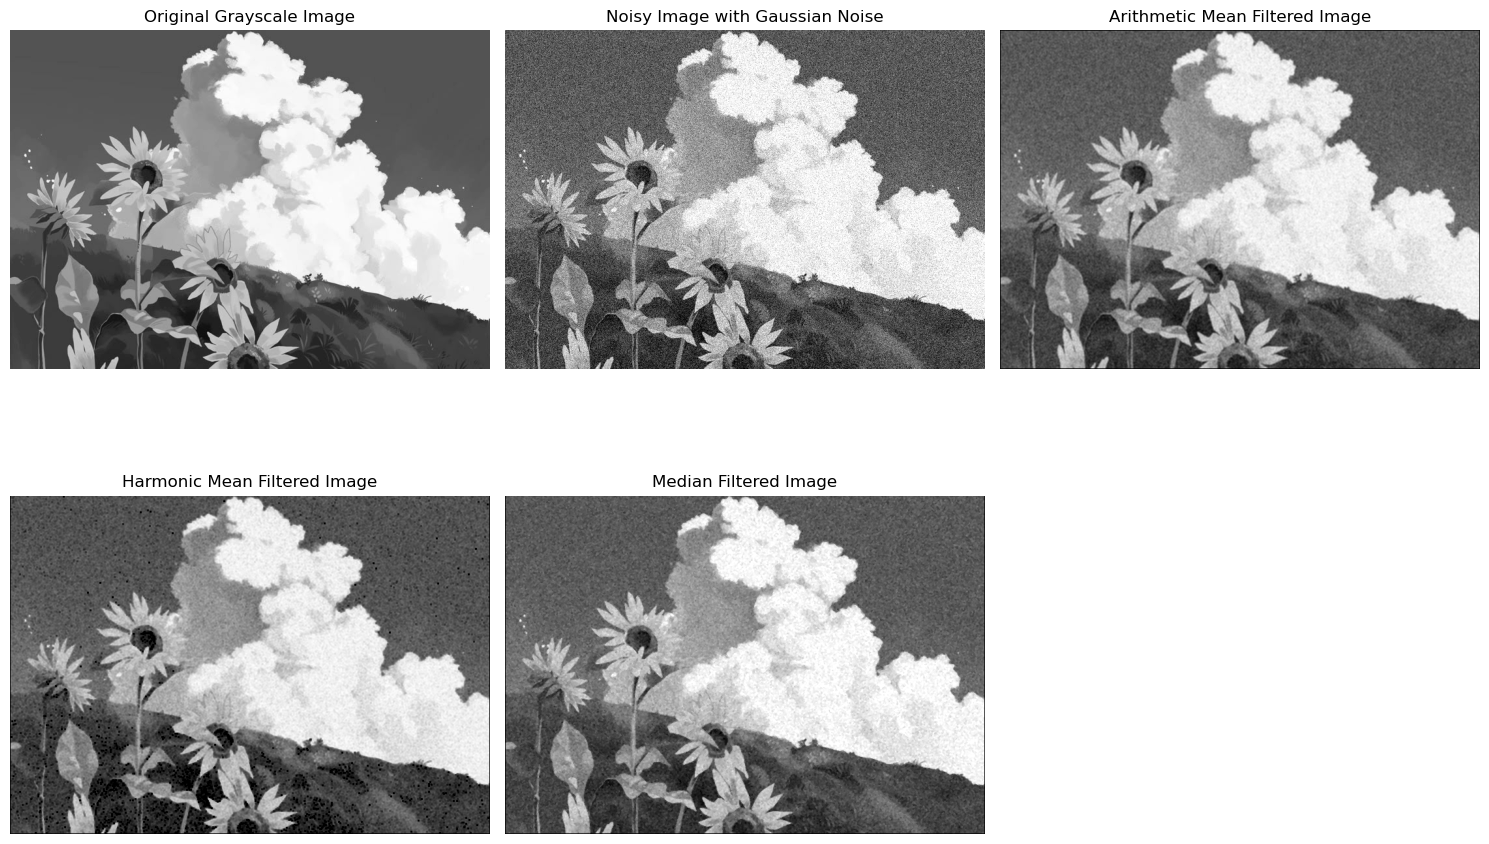

In [13]:
image = cv2.imread("C:/Users/DELL/OneDrive/Desktop/Afraa/Images/nature.jpeg", cv2.IMREAD_GRAYSCALE)

# Add Gaussian noise to the image
noisy_image = add_gaussian_noise_gray(image)

#arithmetic mean
height, width = image.shape

arithmetic_mean_image=arithmetic_mean_filter(noisy_image, kernel_size=3)

harmonic_mean_image=harmonic_mean_filter(noisy_image, kernel_size=3)

median_image=median_filter(noisy_image, kernel_size=3)

# Display the images
plt.figure(figsize=(15, 10))

# Plot the original image
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Plot the noisy image
plt.subplot(2, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image with Gaussian Noise')
plt.axis('off')

# Plot the Arithmetic Mean Filtered image
plt.subplot(2, 3, 3)
plt.imshow(arithmetic_mean_image, cmap='gray')
plt.title('Arithmetic Mean Filtered Image')
plt.axis('off')

# Plot the Harmonic Mean Filtered image
plt.subplot(2, 3, 4)
plt.imshow(harmonic_mean_image, cmap='gray')
plt.title('Harmonic Mean Filtered Image')
plt.axis('off')

# Plot the Median Filtered image
plt.subplot(2, 3, 5)
plt.imshow(median_image, cmap='gray')
plt.title('Median Filtered Image')
plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()


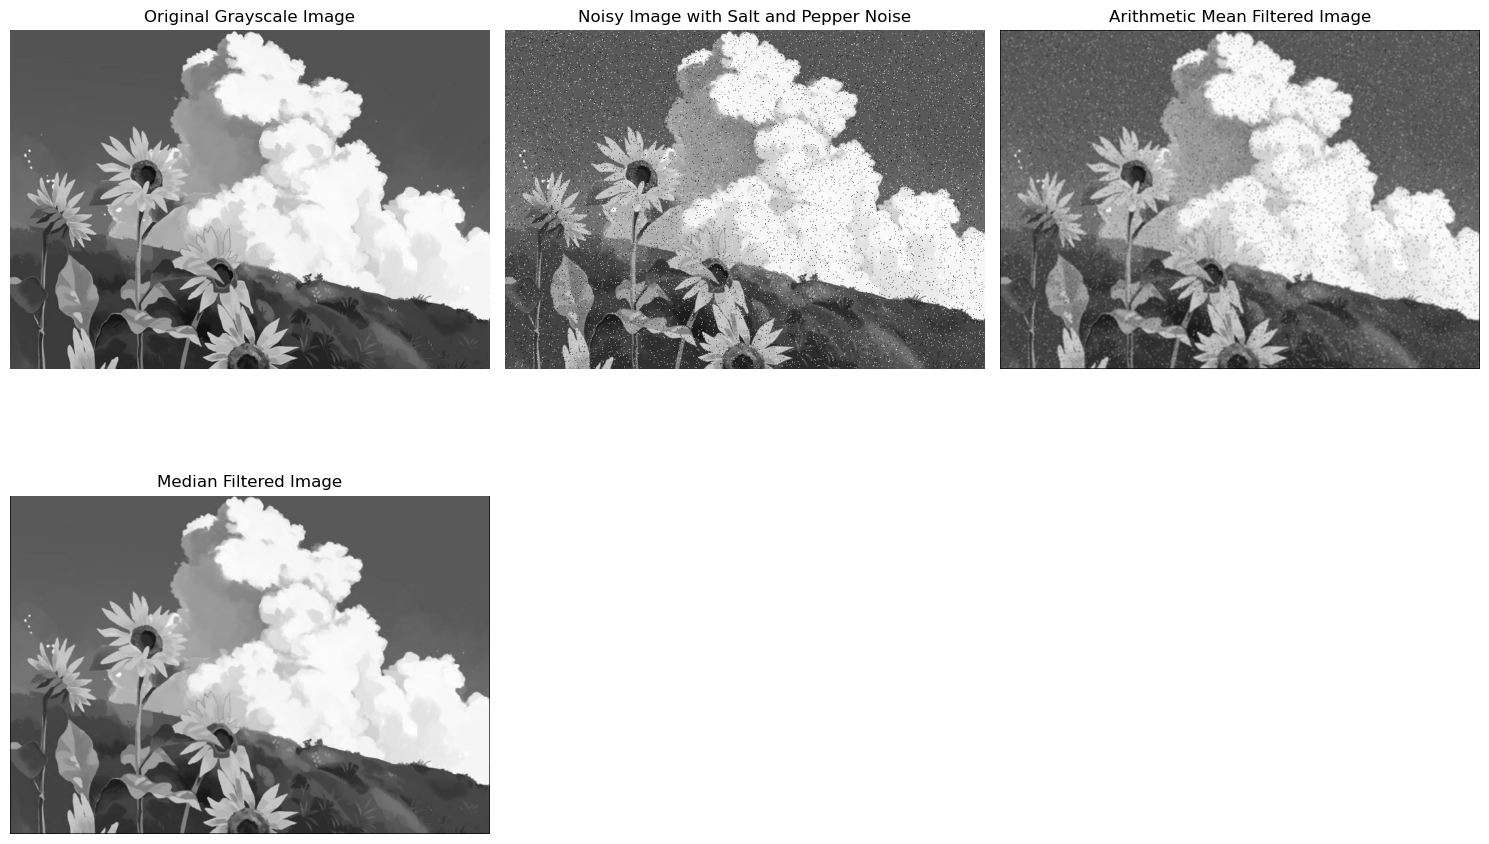

In [15]:
def salt_and_pepper_noise(image, prob):
    noisy_image = image.copy()
    total_pixels = image.size
    num_salt = int(prob * total_pixels)
    num_pepper = int(prob * total_pixels)

    salt_coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy_image[salt_coords[0], salt_coords[1]] = 255

    pepper_coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    noisy_image[pepper_coords[0], pepper_coords[1]] = 0

    return noisy_image

image = cv2.imread("C:/Users/DELL/OneDrive/Desktop/Afraa/Images/nature.jpeg", cv2.IMREAD_GRAYSCALE)

noisy_image = salt_and_pepper_noise(image, 0.02)

height, width = image.shape

arithmetic_mean_image=arithmetic_mean_filter(noisy_image, kernel_size=3)

median_image=median_filter(noisy_image, kernel_size=3)

# Display the images
plt.figure(figsize=(15, 10))

# Plot the original image
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Plot the noisy image
plt.subplot(2, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image with Salt and Pepper Noise')
plt.axis('off')

# Plot the Arithmetic Mean Filtered image
plt.subplot(2, 3, 3)
plt.imshow(arithmetic_mean_image, cmap='gray')
plt.title('Arithmetic Mean Filtered Image')
plt.axis('off')

# Plot the Median Filtered image
plt.subplot(2, 3, 4)
plt.imshow(median_image, cmap='gray')
plt.title('Median Filtered Image')
plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

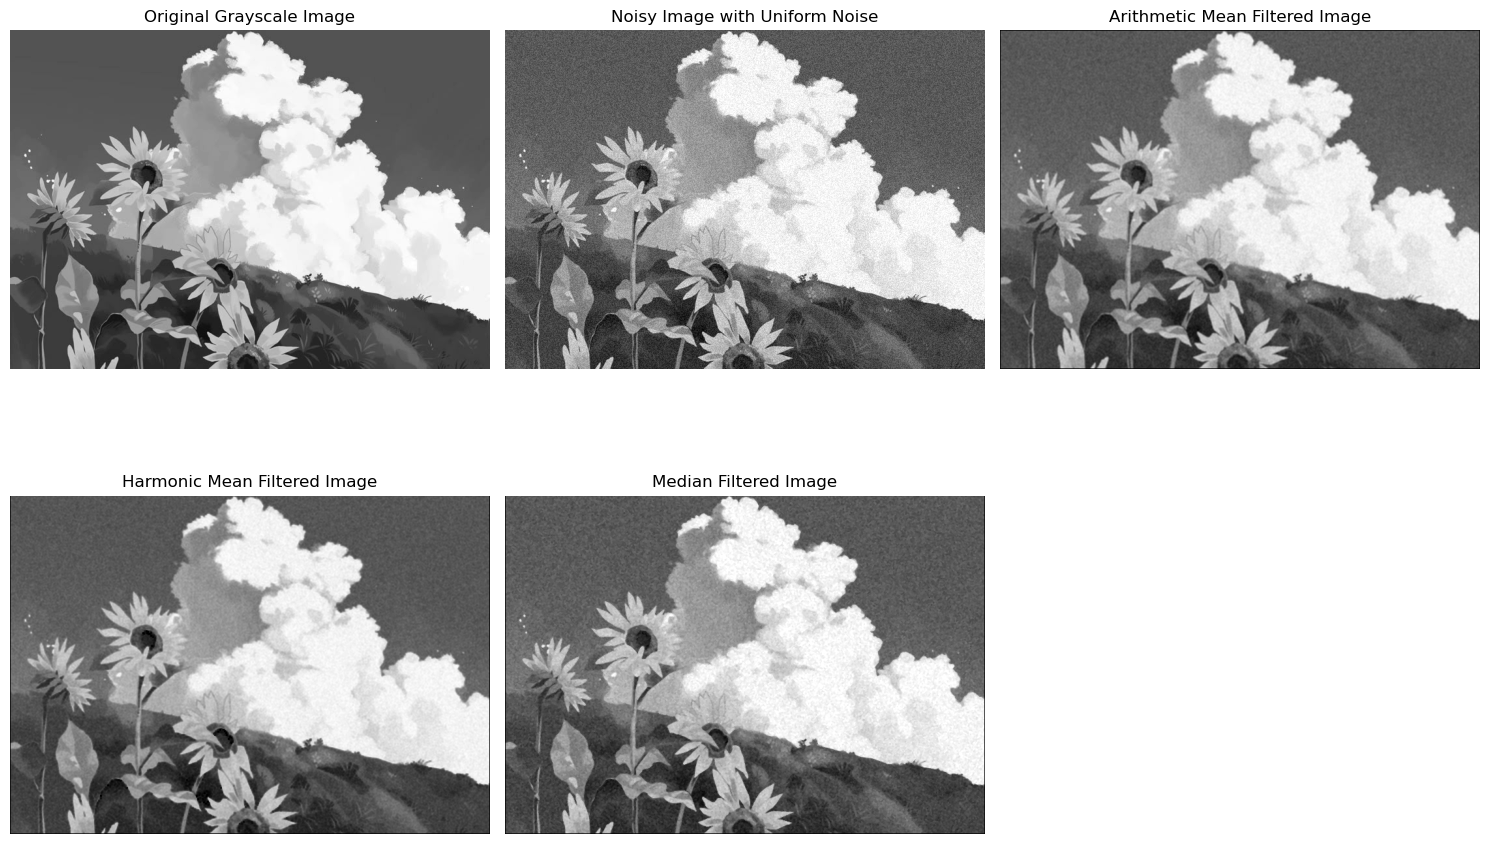

In [17]:
def add_uniform_noise(image, low=-25, high=25):
    uniform_noise = np.random.uniform(low, high, image.shape)

    noisy_image = np.clip(image + uniform_noise, 0, 255).astype(np.uint8)

    return noisy_image

image = cv2.imread("C:/Users/DELL/OneDrive/Desktop/Afraa/Images/nature.jpeg", cv2.IMREAD_GRAYSCALE)

noisy_image = add_uniform_noise(image, low=-25, high=25)

height, width = image.shape

arithmetic_mean_image=arithmetic_mean_filter(noisy_image, kernel_size=3)

median_image=median_filter(noisy_image, kernel_size=3)

harmonic_mean_image=harmonic_mean_filter(noisy_image, kernel_size=3)

# Display the images
plt.figure(figsize=(15, 10))

# Plot the original image
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Plot the noisy image
plt.subplot(2, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image with Uniform Noise')
plt.axis('off')

# Plot the Arithmetic Mean Filtered image
plt.subplot(2, 3, 3)
plt.imshow(arithmetic_mean_image, cmap='gray')
plt.title('Arithmetic Mean Filtered Image')
plt.axis('off')

# Plot the Harmonic Mean Filtered image
plt.subplot(2, 3, 4)
plt.imshow(harmonic_mean_image, cmap='gray')
plt.title('Harmonic Mean Filtered Image')
plt.axis('off')

# Plot the Median Filtered image
plt.subplot(2, 3, 5)
plt.imshow(median_image, cmap='gray')
plt.title('Median Filtered Image')
plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

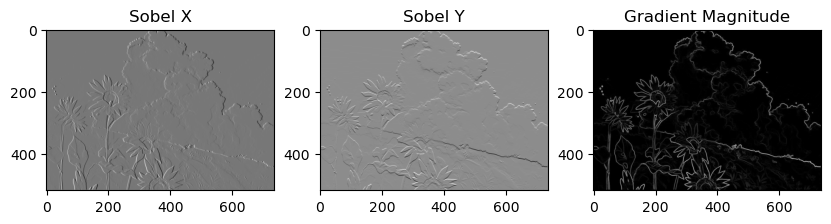

In [21]:
def convolve(image, kernel):
    """Function to manually perform convolution between image and kernel."""
    # Get dimensions
    height, width = image.shape
    k_h, k_w = kernel.shape
    
    # Define output image with zero padding
    pad = k_h // 2
    output = np.zeros((height, width), dtype=np.float32)

    # Apply convolution
    for i in range(pad, height - pad):
        for j in range(pad, width - pad):
            # Extract region of interest
            region = image[i - pad:i + pad + 1, j - pad:j + pad + 1]
            # Convolve (element-wise multiplication and sum)
            output[i, j] = np.sum(region * kernel)

    return output

# Load image in grayscale
image = cv2.imread("C:/Users/DELL/OneDrive/Desktop/Afraa/Images/nature.jpeg", cv2.IMREAD_GRAYSCALE)  

# Define Sobel kernels
sobel_x = np.array([[-1, 0, 1], 
                     [-2, 0, 2], 
                     [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1], 
                     [0,  0,  0], 
                     [1,  2,  1]])

# Apply convolution manually
grad_x = convolve(image, sobel_x)
grad_y = convolve(image, sobel_y)

# Compute gradient magnitude
gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
gradient_magnitude = (gradient_magnitude / np.max(gradient_magnitude) * 255).astype(np.uint8)  # Normalize

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1), plt.imshow(grad_x, cmap='gray'), plt.title('Sobel X')
plt.subplot(1, 3, 2), plt.imshow(grad_y, cmap='gray'), plt.title('Sobel Y')
plt.subplot(1, 3, 3), plt.imshow(gradient_magnitude, cmap='gray'), plt.title('Gradient Magnitude')
plt.show()

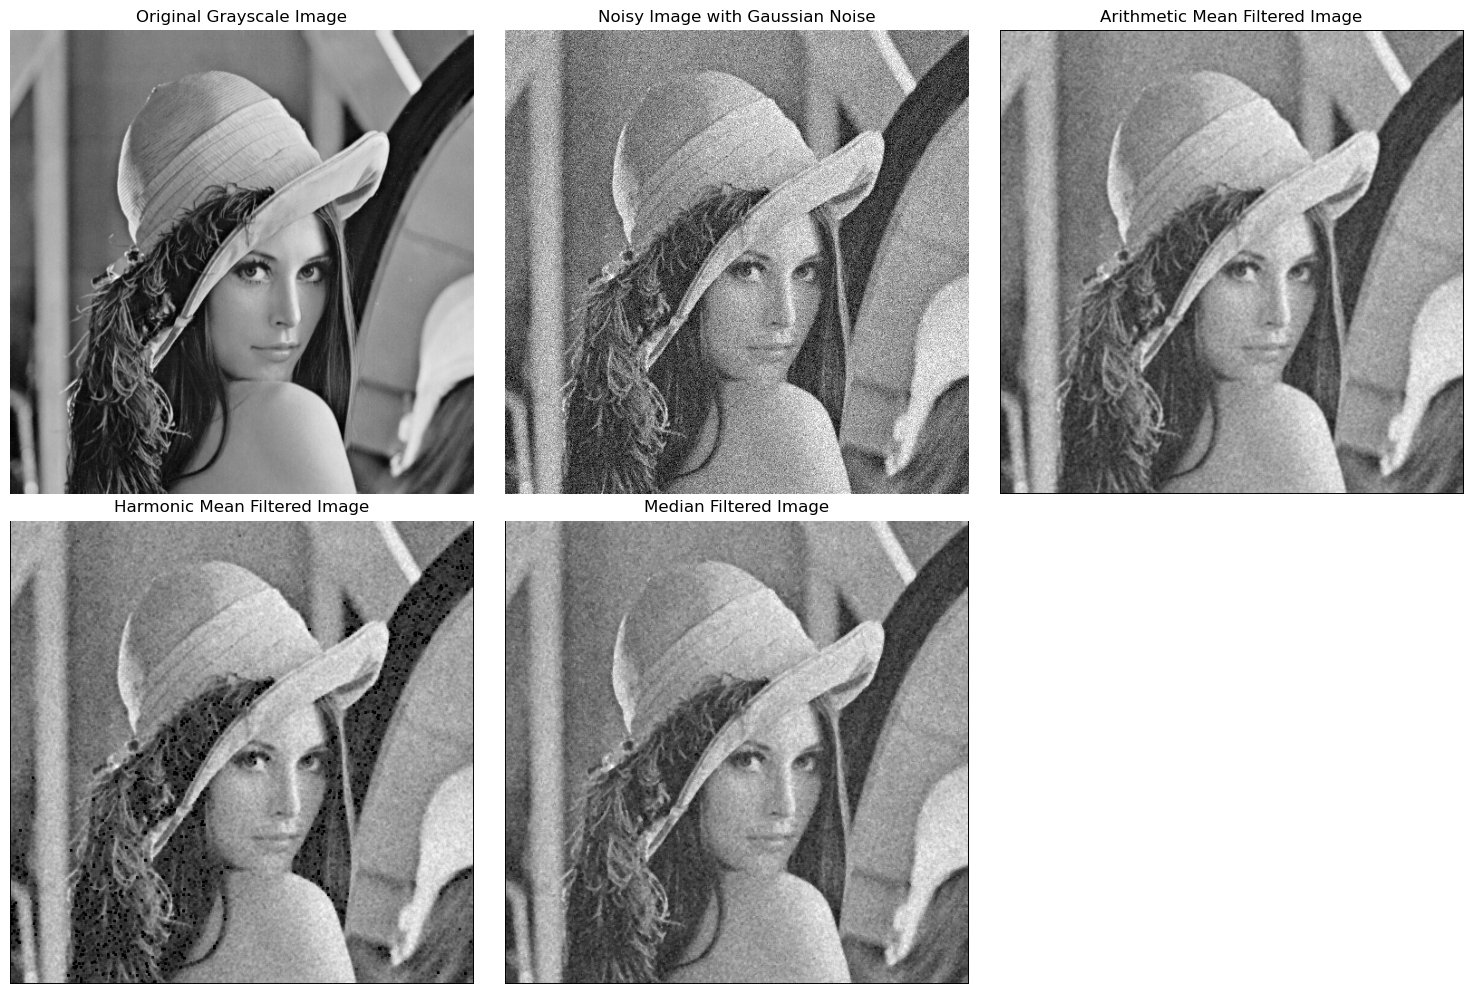

In [43]:
image = cv2.imread("C:/Users/DELL/OneDrive/Desktop/Afraa/Images/lena.png", cv2.IMREAD_GRAYSCALE)

# Add Gaussian noise to the image
noisy_image = add_gaussian_noise_gray(image)

#arithmetic mean
height, width = image.shape

arithmetic_mean_image=arithmetic_mean_filter(noisy_image, kernel_size=3)

harmonic_mean_image=harmonic_mean_filter(noisy_image, kernel_size=3)

median_image=median_filter(noisy_image, kernel_size=3)

# Display the images
plt.figure(figsize=(15, 10))

# Plot the original image
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Plot the noisy image
plt.subplot(2, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image with Gaussian Noise')
plt.axis('off')

# Plot the Arithmetic Mean Filtered image
plt.subplot(2, 3, 3)
plt.imshow(arithmetic_mean_image, cmap='gray')
plt.title('Arithmetic Mean Filtered Image')
plt.axis('off')

# Plot the Harmonic Mean Filtered image
plt.subplot(2, 3, 4)
plt.imshow(harmonic_mean_image, cmap='gray')
plt.title('Harmonic Mean Filtered Image')
plt.axis('off')

# Plot the Median Filtered image
plt.subplot(2, 3, 5)
plt.imshow(median_image, cmap='gray')
plt.title('Median Filtered Image')
plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

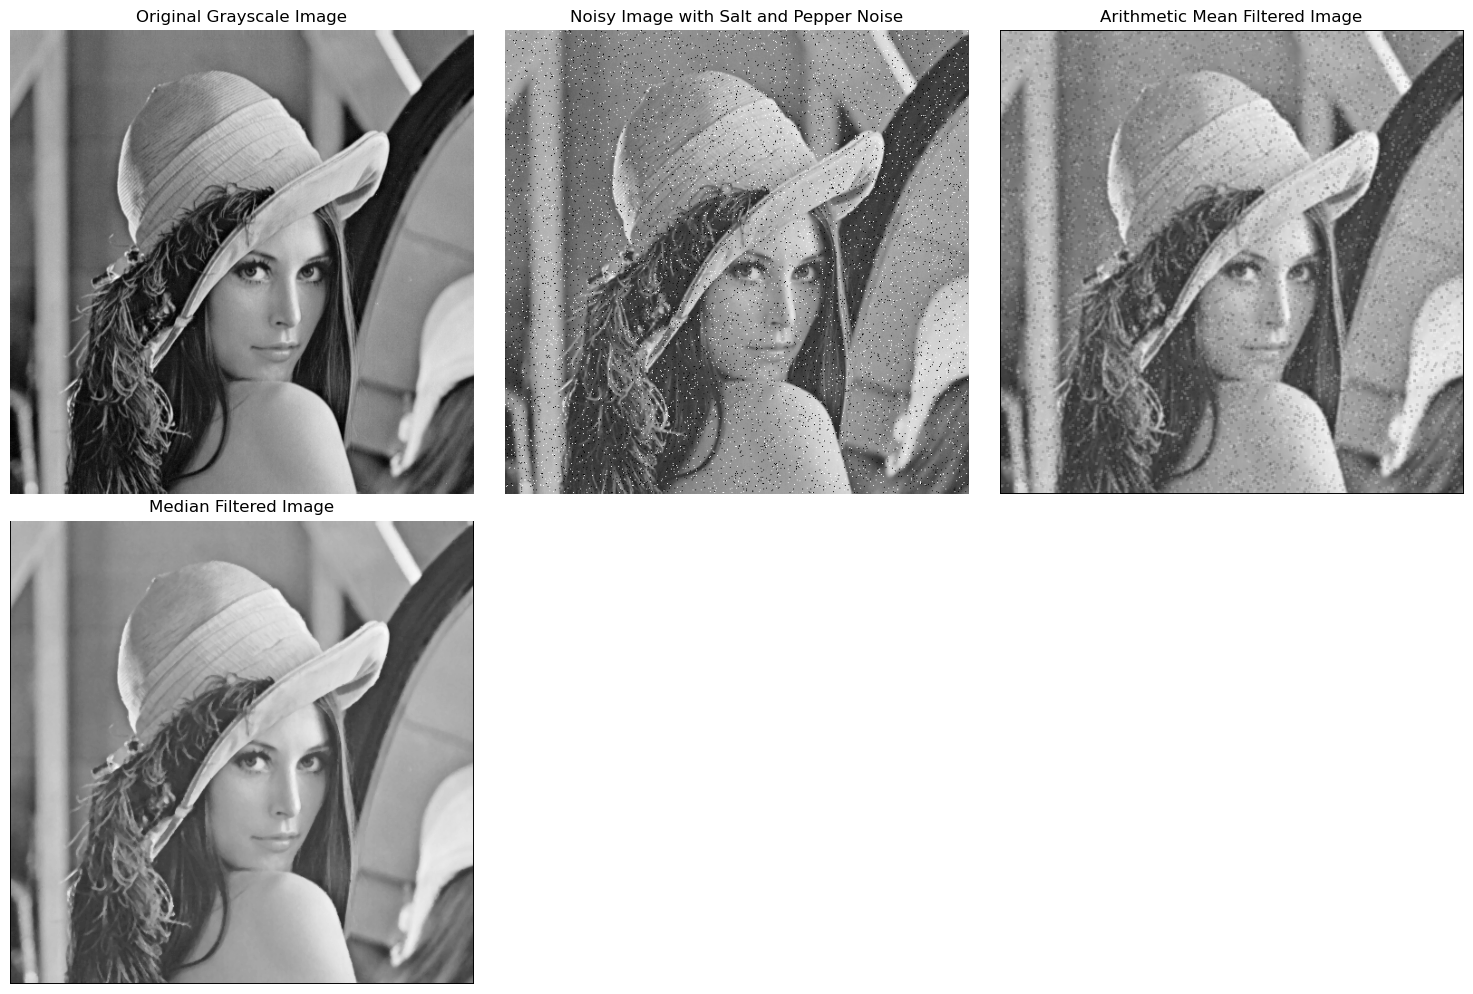

In [37]:
def salt_and_pepper_noise(image, prob):
    noisy_image = image.copy()
    total_pixels = image.size
    num_salt = int(prob * total_pixels)
    num_pepper = int(prob * total_pixels)

    salt_coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy_image[salt_coords[0], salt_coords[1]] = 255

    pepper_coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    noisy_image[pepper_coords[0], pepper_coords[1]] = 0

    return noisy_image

image = cv2.imread("C:/Users/DELL/OneDrive/Desktop/Afraa/Images/lena.png", cv2.IMREAD_GRAYSCALE)

noisy_image = salt_and_pepper_noise(image, 0.02)

height, width = image.shape

arithmetic_mean_image=arithmetic_mean_filter(noisy_image, kernel_size=3)

median_image=median_filter(noisy_image, kernel_size=3)

# Display the images
plt.figure(figsize=(15, 10))

# Plot the original image
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Plot the noisy image
plt.subplot(2, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image with Salt and Pepper Noise')
plt.axis('off')

# Plot the Arithmetic Mean Filtered image
plt.subplot(2, 3, 3)
plt.imshow(arithmetic_mean_image, cmap='gray')
plt.title('Arithmetic Mean Filtered Image')
plt.axis('off')

# Plot the Median Filtered image
plt.subplot(2, 3, 4)
plt.imshow(median_image, cmap='gray')
plt.title('Median Filtered Image')
plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

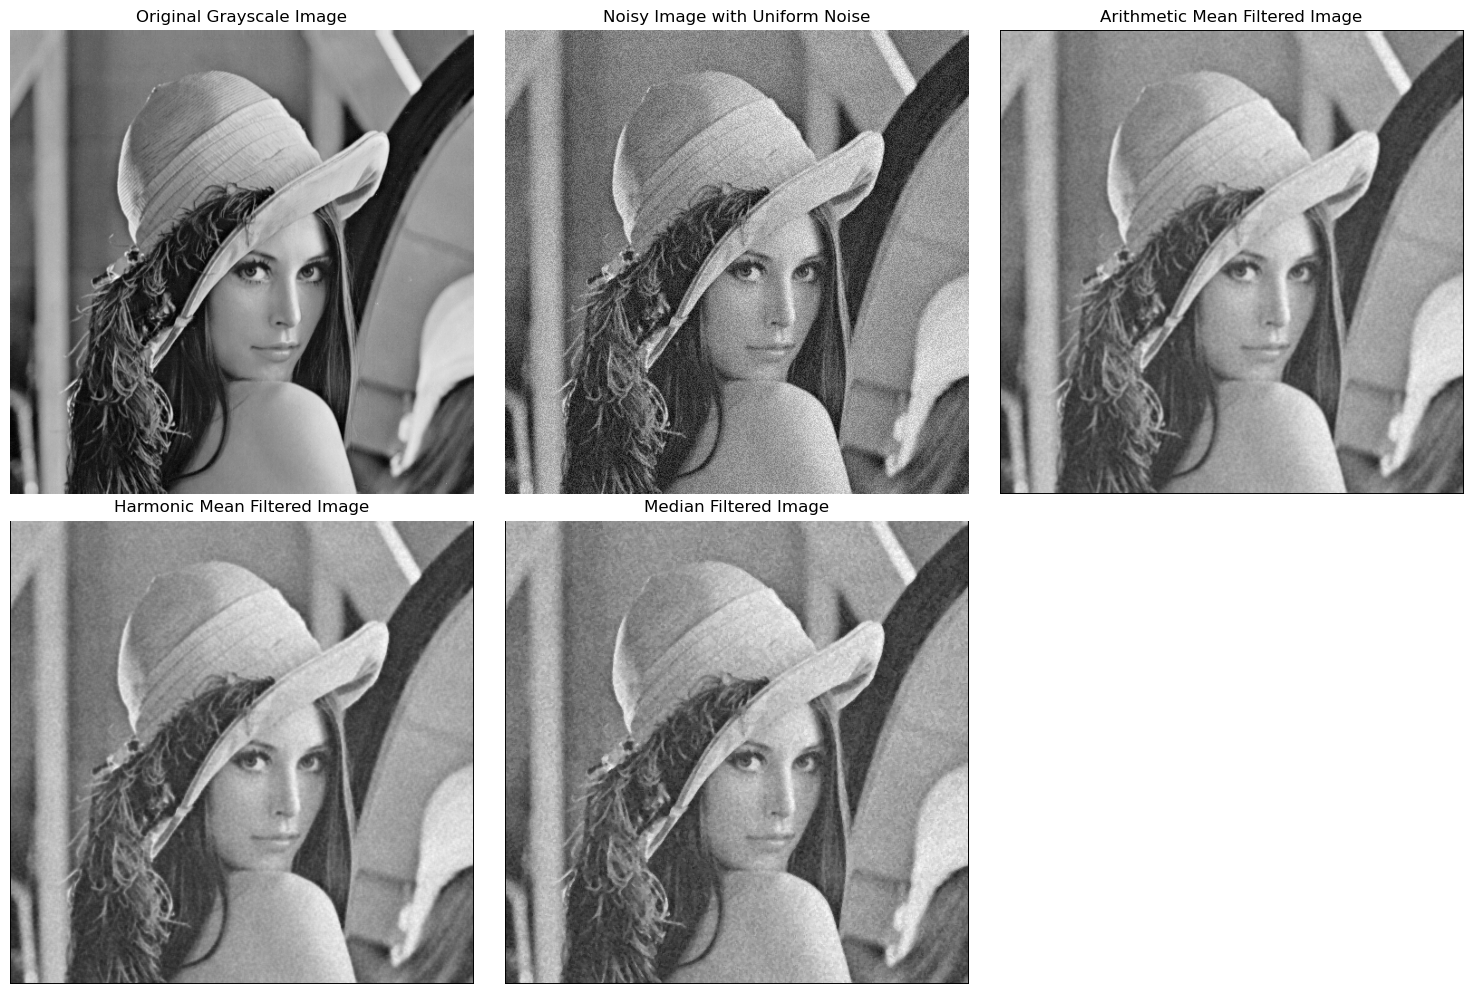

In [39]:
def add_uniform_noise(image, low=-25, high=25):
    uniform_noise = np.random.uniform(low, high, image.shape)

    noisy_image = np.clip(image + uniform_noise, 0, 255).astype(np.uint8)

    return noisy_image

image = cv2.imread("C:/Users/DELL/OneDrive/Desktop/Afraa/Images/lena.png", cv2.IMREAD_GRAYSCALE)

noisy_image = add_uniform_noise(image, low=-25, high=25)

height, width = image.shape

arithmetic_mean_image=arithmetic_mean_filter(noisy_image, kernel_size=3)

median_image=median_filter(noisy_image, kernel_size=3)

harmonic_mean_image=harmonic_mean_filter(noisy_image, kernel_size=3)

# Display the images
plt.figure(figsize=(15, 10))

# Plot the original image
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Plot the noisy image
plt.subplot(2, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image with Uniform Noise')
plt.axis('off')

# Plot the Arithmetic Mean Filtered image
plt.subplot(2, 3, 3)
plt.imshow(arithmetic_mean_image, cmap='gray')
plt.title('Arithmetic Mean Filtered Image')
plt.axis('off')

# Plot the Harmonic Mean Filtered image
plt.subplot(2, 3, 4)
plt.imshow(harmonic_mean_image, cmap='gray')
plt.title('Harmonic Mean Filtered Image')
plt.axis('off')

# Plot the Median Filtered image
plt.subplot(2, 3, 5)
plt.imshow(median_image, cmap='gray')
plt.title('Median Filtered Image')
plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

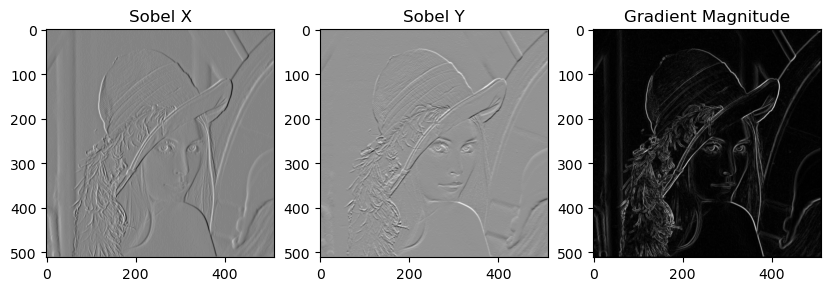

In [45]:
def convolve(image, kernel):
    """Function to manually perform convolution between image and kernel."""
    # Get dimensions
    height, width = image.shape
    k_h, k_w = kernel.shape
    
    # Define output image with zero padding
    pad = k_h // 2
    output = np.zeros((height, width), dtype=np.float32)

    # Apply convolution
    for i in range(pad, height - pad):
        for j in range(pad, width - pad):
            # Extract region of interest
            region = image[i - pad:i + pad + 1, j - pad:j + pad + 1]
            # Convolve (element-wise multiplication and sum)
            output[i, j] = np.sum(region * kernel)

    return output

# Load image in grayscale
image = cv2.imread("C:/Users/DELL/OneDrive/Desktop/Afraa/Images/lena.png", cv2.IMREAD_GRAYSCALE)  

# Define Sobel kernels
sobel_x = np.array([[-1, 0, 1], 
                     [-2, 0, 2], 
                     [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1], 
                     [0,  0,  0], 
                     [1,  2,  1]])

# Apply convolution manually
grad_x = convolve(image, sobel_x)
grad_y = convolve(image, sobel_y)

# Compute gradient magnitude
gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
gradient_magnitude = (gradient_magnitude / np.max(gradient_magnitude) * 255).astype(np.uint8)  # Normalize

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1), plt.imshow(grad_x, cmap='gray'), plt.title('Sobel X')
plt.subplot(1, 3, 2), plt.imshow(grad_y, cmap='gray'), plt.title('Sobel Y')
plt.subplot(1, 3, 3), plt.imshow(gradient_magnitude, cmap='gray'), plt.title('Gradient Magnitude')
plt.show()